# Optimizing a neural network with backward propagation
>  Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Introduction to Deep Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## The need for optimization

### Calculating model errors

<div class=""><p>For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.</p>
<p>What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2_ex2_3.png" alt="Ch2Ex2"></p></div>

<pre>
Possible Answers

5.

6.

<b>11.</b>

16.
</pre>

In [32]:
pred = (3*2 + 2*1) * 2 + (3*0 + 2*0)*2
pred, pred - 5

(16, 11)

**The network generates a prediction of 16, which results in an error of 11.**

### Understanding how weights change model accuracy

<div class=""><p>Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from <code>node_0</code> to the output is 2, as shown below.  If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2_ex2_3.png" alt="Ch2Ex3"></p></div>

In [33]:
pred = (3*2 + 2*1) * 2 + (3*0 + 2*0)*2
pred, pred - 7

(16, 9)

In [37]:
pred = (3*2 + 2*1) * 2.01 + (3*0 + 2*0)*2
pred, pred - 7

(16.08, 9.079999999999998)

**Increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate.**

### Coding how weight changes affect accuracy

<div class=""><p>Now you'll get to change weights in a real network and see how they affect model accuracy!</p>
<p>Have a look at the following neural network:
<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex4.png" alt="Ch2Ex4"></p>
<p>Its weights have been pre-loaded as <code>weights_0</code>. Your task in this exercise is to update a <strong>single</strong> weight in <code>weights_0</code> to create <code>weights_1</code>, which gives a perfect prediction (in which the predicted value is equal to <code>target_actual</code>: 3). </p>
<p>Use a pen and paper if necessary to experiment with different combinations. You'll use the <code>predict_with_network()</code> function, which takes an array of data as the first argument, and weights as the second argument.</p></div>

In [41]:
def relu(my_input):
    return(max(0, my_input))
    
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

Instructions
<ul>
<li>Create a dictionary of weights called <code>weights_1</code> where you have changed <strong>1</strong> weight from <code>weights_0</code> (You only need to make 1 edit to <code>weights_0</code> to generate the perfect prediction). </li>
<li>Obtain predictions with the new weights using the <code>predict_with_network()</code> function with <code>input_data</code> and <code>weights_1</code>.</li>
<li>Calculate the error for the new weights by subtracting <code>target_actual</code> from <code>model_output_1</code>. </li>
<li>Hit 'Submit Answer' to see how the errors compare!</li>
</ul>

In [42]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 =  predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


**The network now generates a perfect prediction with an error of 0.**

### Scaling up to multiple data points

<div class=""><p>You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as <code>weights_0</code> and <code>weights_1</code>.  </p>
<p><code>input_data</code> is a list of arrays.  Each item in that list contains the data to make a single prediction.
<code>target_actuals</code> is a list of numbers. Each item in that list is the actual value we are trying to predict.</p>
<p>In this exercise, you'll use the <code>mean_squared_error()</code> function from <code>sklearn.metrics</code>. It takes the true values and the predicted values as arguments.</p>
<p>You'll also use the preloaded <code>predict_with_network()</code> function, which takes an array of data as the first argument, and weights as the second argument.</p></div>

In [43]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

Instructions
<ul>
<li>Import <code>mean_squared_error</code> from <code>sklearn.metrics</code>.</li>
<li>Using a <code>for</code> loop to iterate over each row of <code>input_data</code>:<ul>
<li>Make predictions for each row with <code>weights_0</code> using the <code>predict_with_network()</code> function and append it to <code>model_output_0</code>.</li>
<li>Do the same for <code>weights_1</code>, appending the predictions to <code>model_output_1</code>.</li></ul></li>
<li>Calculate the mean squared error of <code>model_output_0</code> and then <code>model_output_1</code> using the <code>mean_squared_error()</code> function. The first argument should be the actual values (<code>target_actuals</code>), and the second argument should be the predicted values (<code>model_output_0</code> or <code>model_output_1</code>).</li>
</ul>

In [44]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


**It looks like model_output_1 has a higher mean squared error.**

## Gradient descent

### Calculating slopes

<div class=""><p>You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is <code>2 * x * (xb-y)</code>, or <code>2 * input_data * error</code>. Note that <code>x</code> and <code>b</code> may have multiple numbers (<code>x</code> is a vector for each data point, and <code>b</code> is a vector).  In this case, the output will also be a vector, which is exactly what you want. </p>
<p>You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called <code>weights</code> as well as data for a single point called <code>input_data</code>.  The actual value of the target you want to predict is stored in <code>target</code>.</p></div>

In [47]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

Instructions
<ul>
<li>Calculate the predictions, <code>preds</code>, by multiplying <code>weights</code> by the <code>input_data</code> and computing their sum.</li>
<li>Calculate the error, which is <code>preds</code> minus <code>target</code>. Notice that this error corresponds to <code>xb-y</code> in the gradient expression.</li>
<li>Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of <code>input_data</code> and <code>error</code> and multiply that by <code>2</code>.</li>
</ul>

In [48]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


**You can now use this slope to improve the weights of the model!**

### Improving model weights

<div class=""><p>Hurray!  You've just calculated the slopes you need.  Now it's time to use those slopes to improve your model.  If you add the slopes to your weights, you will move in the right direction.  However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.</p>
<p>The weights have been pre-loaded as <code>weights</code>, the actual value of the target as <code>target</code>, and the input data as <code>input_data</code>. The predictions from the initial weights are stored as <code>preds</code>.</p></div>

Instructions
<ul>
<li>Set the learning rate to be <code>0.01</code> and calculate the error from the original predictions. This has been done for you.</li>
<li>Calculate the updated weights by subtracting the product of <code>learning_rate</code> and <code>slope</code> from <code>weights</code>.</li>
<li>Calculate the updated predictions by multiplying <code>weights_updated</code> with <code>input_data</code> and computing their sum.</li>
<li>Calculate the error for the new predictions. Store the result as <code>error_updated</code>.</li>
<li>Hit 'Submit Answer' to compare the updated error to the original!</li>
</ul>

In [49]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


**Updating the model weights did indeed decrease the error!**

### Making multiple updates to weights

<div class=""><p>You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update. </p>
<p>To keep your code clean, there is a pre-loaded <code>get_slope()</code> function that takes <code>input_data</code>, <code>target</code>, and <code>weights</code> as arguments. There is also a <code>get_mse()</code> function that takes the same arguments.  The <code>input_data</code>, <code>target</code>, and <code>weights</code> have been pre-loaded. </p>
<p>This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node.  Note that <code>weights</code> is a single array.</p>
<p>We have also pre-loaded <code>matplotlib.pyplot</code>, and the error history will be plotted after you have done your gradient descent steps.</p></div>

In [57]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

Instructions
<ul>
<li>Using a <code>for</code> loop to iteratively update weights:<ul>
<li>Calculate the slope using the <code>get_slope()</code> function.</li>
<li>Update the weights using a learning rate of <code>0.01</code>. </li>
<li>Calculate the mean squared error (<code>mse</code>) with the updated weights using the <code>get_mse()</code> function.</li>
<li>Append <code>mse</code> to <code>mse_hist</code>.</li></ul></li>
<li>Hit 'Submit Answer' to visualize <code>mse_hist</code>. What trend do you notice?</li>
</ul>

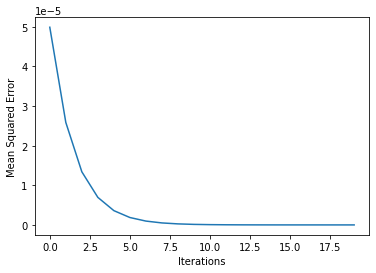

In [58]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

**As you can see, the mean squared error decreases as the number of iterations go up.**

## Backpropagation

### The relationship between forward and backward propagation

<p>If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?</p>

<pre>
Possible Answers

0.

1.

<b>4.</b>

8.

</pre>

**Each time you generate predictions using forward propagation, you update the weights using backward propagation.**

### Thinking about backward propagation

<p>If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?</p>

<pre>
Possible Answers

<b>The updates to all weights in the network would also be 0.</b>

The updates to all weights in the network would be dependent on the activation functions.

The updates to all weights in the network would be proportional to values from the input data.

</pre>

**In this situation, the updates to all weights in the network would indeed also be 0.**

## Backpropagation in practice

## A round of backpropagation

<div class=""><p>In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black.  Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.  </p>
<p>This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex14_1.png" alt="Ch2Ex14_1"></p>
<p>What is the slope needed to update the weight with the question mark?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch2ex14_2.png" alt="Ch2Ex14_2"></p></div>

<pre>
Possible Answers

0.

2.

<b>6.</b>

Not enough information.

</pre>

In [59]:
2*3*1

6

**The slope needed to update this weight is indeed 6. You're now ready to start building deep learning models with keras!**